In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("../data/clean/Churn_Modeling.csv")

### Churn Patterns
* **What precentage of customers churned?**

In [6]:
# Total number of customers
total_customers = df.shape[0]

# Number of customers who churned
churned_customers = df['Exited'].sum() # Since exited is 1

percent_churned = (churned_customers/total_customers) * 100
print(f"Percentage of customers who churned: {percent_churned:.2f}%")

Percentage of customers who churned: 20.37%


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

def bar_chart_seaborn(list, x, x_value, title):
    # Convert list of dictionaries to DataFrame
    churn_df = pd.DataFrame(list)

    # Set Seaborn style
    sns.set_style("whitegrid")

    # Create bar plot
    plt.figure(figsize=(8,5))
    ax = sns.barplot(
        x=x_value,
        y='percent_churned',
        data=churn_df,
        palette='Blues_d'
    )

    # Add labels on top of bars
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.2f}%", 
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom',
            fontsize=11
        )

    # Titles and labels
    plt.title(title, fontsize=14)
    plt.xlabel(x, fontsize=12)
    plt.ylabel('Churn Percentage (%)', fontsize=12)
    plt.ylim(0, churn_df['percent_churned'].max() + 10)
    plt.show()

In [74]:
def churn_percent_calc(filter, filter_name):
    list_all = df[filter].dropna().unique()
    percent_list = []
    
    for x in list_all:
        y = df[df[filter] == x]
        total_customers = y.shape[0]
        churned_customers = y['Exited'].sum()
        
        percent_churned = (churned_customers/total_customers) * 100
        
        # Add to list as a dictionary
        percent_list.append({
            filter_name: x,
            'percent_churned': round(float(percent_churned), 2)
        })
        
    return percent_list

* **How churn differs by country**

In [75]:
churn_country_percentages = churn_percent_calc('Geography', 'country')
churn_country_percentages

[{'country': 'france', 'percent_churned': 16.17},
 {'country': 'spain', 'percent_churned': 16.67},
 {'country': 'germany', 'percent_churned': 32.52}]

/var/folders/_w/hl02d98541dd3q6j_ggmh1_m0000gn/T/ipykernel_42568/2680481927.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




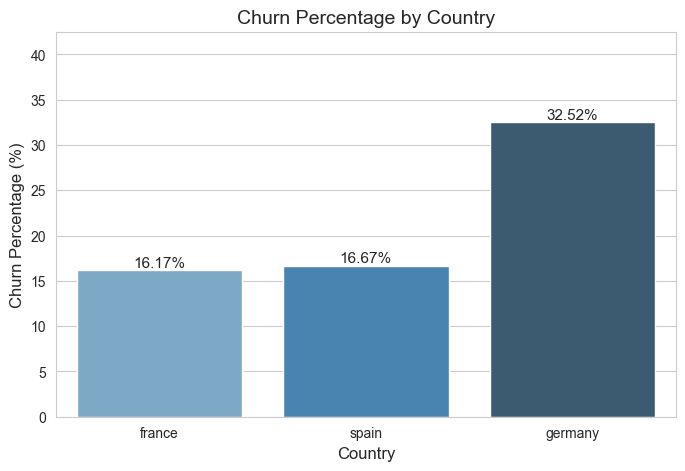

In [76]:
bar_chart_seaborn(churn_country_percentages, "Country", "country", "Churn Percentage by Country")

* **How churn changes with tenure?**

for each tenure:
    churn_rate = (number of customers exited with that tenure / total customers with that tenure) * 100


In [63]:
churn_tenre_percentages = churn_percent_calc('tenure_bucket', 'tenure_bracket')
churn_tenre_percentages

[{'tenure_bracket': '0-2 years', 'percent_churned': 20.86},
 {'tenure_bracket': '6-10 years', 'percent_churned': 19.67},
 {'tenure_bracket': '3-5 years', 'percent_churned': 20.81}]

/var/folders/_w/hl02d98541dd3q6j_ggmh1_m0000gn/T/ipykernel_42568/2680481927.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




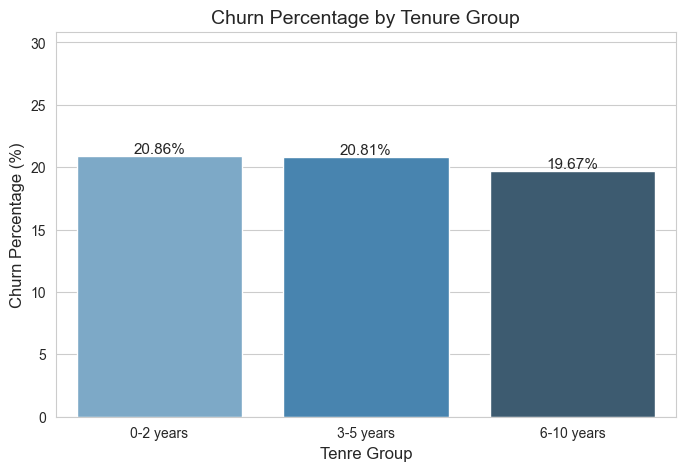

In [65]:
# Define the desired order
tenure_order = ['0-2 years', '3-5 years', '6-10 years']

# Convert list of dicts to DataFrame
df_tenure = pd.DataFrame(churn_tenre_percentages)

# Make 'tenure_bracket' a categorical with ordered levels
df_tenure['tenure_bracket'] = pd.Categorical(
    df_tenure['tenure_bracket'], 
    categories=tenure_order,
    ordered=True
)

# Now pass df_tenure to your plotting function
bar_chart_seaborn(df_tenure, 'Tenre Group', 'tenure_bracket', 'Churn Percentage by Tenure Group')

* **Does credit score impact churn?**

In [77]:
churn_credit_percentages = churn_percent_calc('RiskScoreBucket', 'credit_score_bucket')
churn_credit_percentages

[{'credit_score_bucket': 'medium risk', 'percent_churned': 19.78},
 {'credit_score_bucket': 'high risk', 'percent_churned': 22.17},
 {'credit_score_bucket': 'low risk', 'percent_churned': 19.92}]

/var/folders/_w/hl02d98541dd3q6j_ggmh1_m0000gn/T/ipykernel_42568/2680481927.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




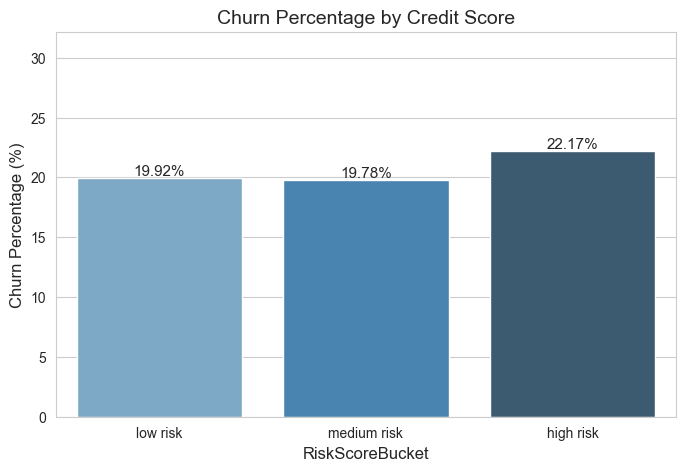

In [78]:
# Define the desired order
tenure_order = ['low risk', 'medium risk', 'high risk']

# Convert list of dicts to DataFrame
df_tenure = pd.DataFrame(churn_credit_percentages)

# Make 'tenure_bracket' a categorical with ordered levels
df_tenure['credit_score_bucket'] = pd.Categorical(
    df_tenure['credit_score_bucket'], 
    categories=tenure_order,
    ordered=True
)

# Now pass df_tenure to your plotting function
bar_chart_seaborn(df_tenure, 'RiskScoreBucket', 'credit_score_bucket', 'Churn Percentage by Credit Score')

* **Do high-balance customers churn more?**

In [81]:
# High balance churn
churn_high = df[df['ActiveHighBalance'] == 1]['Exited'].mean() * 100

# Low balance churn
churn_low = df[df['ActiveLowBalance'] == 1]['Exited'].mean() * 100

print(f"Churn percentage for active high-balance customers: {churn_high:.2f}%")
print(f"Churn percentage for active low-balance customers: {churn_low:.2f}%")

Churn percentage for active high-balance customers: 17.93%
Churn percentage for active low-balance customers: 10.69%


* **Does a specific gender and age churn more than the other?**

In [ ]:
churn_gender_age_percentages = churn_percent_calc("GenderAgeGroup", "gender_age_group")
churn_gender_age_percentages

[{'gender_age_group': 'female_31-45', 'percent_churned': 19.67},
 {'gender_age_group': 'male_31-45', 'percent_churned': 12.6},
 {'gender_age_group': 'male_46-60', 'percent_churned': 44.97},
 {'gender_age_group': 'female_18-30', 'percent_churned': 9.93},
 {'gender_age_group': 'male_18-30', 'percent_churned': 5.51},
 {'gender_age_group': 'female_46-60', 'percent_churned': 57.3},
 {'gender_age_group': 'female_60+', 'percent_churned': 30.05},
 {'gender_age_group': 'male_60+', 'percent_churned': 20.32}]

In [67]:
# Convert list of dictionaries
churn_df = pd.DataFrame(churn_gender_age_percentages)

# Split 'gender_age_group' into separate columns
churn_df[['Gender', 'AgeGroup']] = churn_df['gender_age_group'].str.split('_', expand=True)


In [68]:
print(churn_df.head())

  gender_age_group  percent_churned  Gender AgeGroup
0     female_31-45            19.67  female    31-45
1       male_31-45            12.60    male    31-45
2       male_46-60            44.97    male    46-60
3     female_18-30             9.93  female    18-30
4       male_18-30             5.51    male    18-30


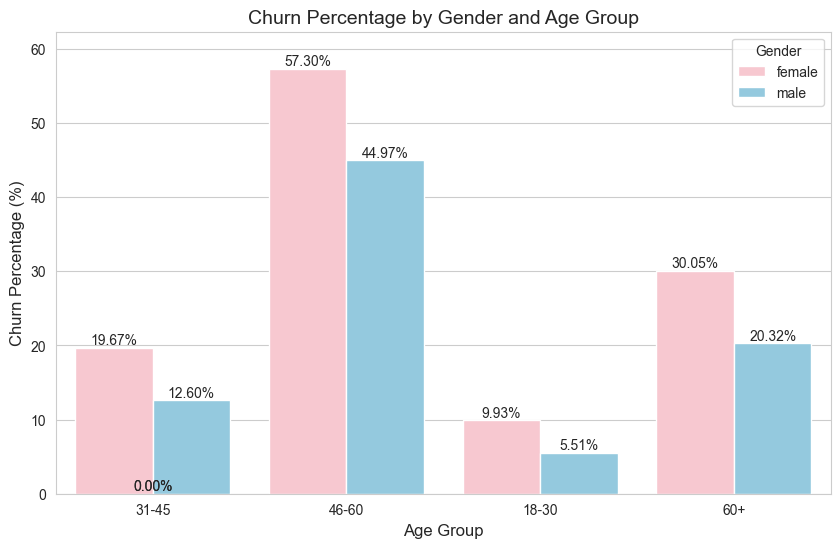

In [69]:
# Set Seaborn style
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))

# Create grouped bar chart
ax = sns.barplot(
    x='AgeGroup', 
    y='percent_churned', 
    hue='Gender', 
    data=churn_df, 
    palette={'female': 'pink', 'male': 'skyblue'}
)

# Add labels on top of bars
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}%", 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='bottom',
        fontsize=10
    )

# Titles and labels
plt.title('Churn Percentage by Gender and Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Churn Percentage (%)', fontsize=12)
plt.legend(title='Gender')
plt.ylim(0, churn_df['percent_churned'].max() + 5)

plt.show()


## Behavior Trends

* **Are inactive members more likely to churn?**

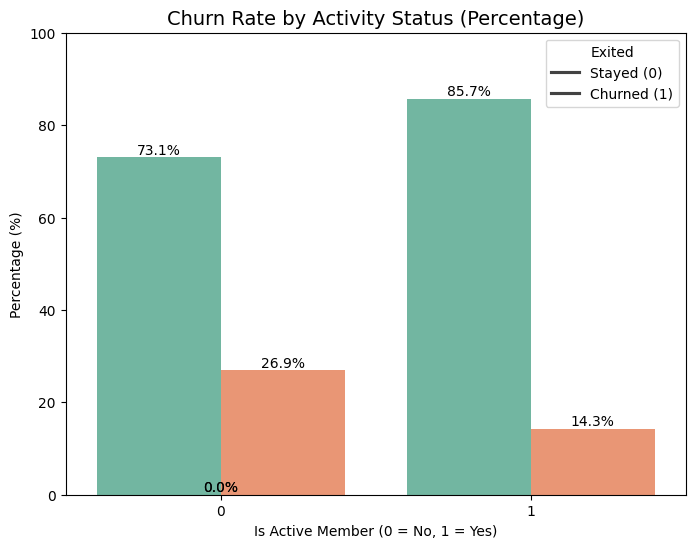

In [3]:
# Create a normalized table (percentage churn)
activity_churn = (
    df.groupby('IsActiveMember')['Exited']
      .value_counts(normalize=True)
      .rename('percent')
      .mul(100)
      .reset_index()
)

plt.figure(figsize=(8,6))
sns.barplot(
    data=activity_churn,
    x='IsActiveMember',
    y='percent',
    hue='Exited',
    palette='Set2'
)

plt.title('Churn Rate by Activity Status (Percentage)', fontsize=14)
plt.xlabel('Is Active Member (0 = No, 1 = Yes)')
plt.ylabel('Percentage (%)')
plt.legend(title='Exited', labels=['Stayed (0)', 'Churned (1)'])

# Add labels on bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height:.1f}%',
                       (p.get_x() + p.get_width()/2., height),
                       ha='center', va='bottom', fontsize=10)

plt.ylim(0, 100)
plt.show()


**High-balance customers who rarely transact**

Column: BalanceSalaryRatio

Hypothesis: Customers with unusually high balances relative to their salary may be more likely to churn if they feel under-served or over-leveraged.

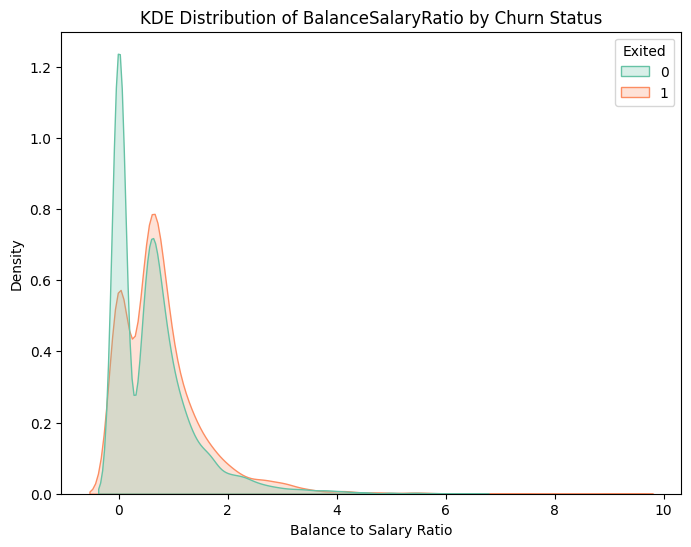

In [5]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    data=df,
    x='BalanceSalaryRatio',
    hue='Exited',
    fill=True,
    common_norm=False,
    palette='Set2'
)

plt.xlabel('Balance to Salary Ratio')
plt.ylabel('Density')
plt.title('KDE Distribution of BalanceSalaryRatio by Churn Status')
plt.show()


* **Active Members with Low Product Engagement**

Columns: IsActiveMember, NumOfProducts

Hypothesis: Customers who are active but use very few products might be more prone to churn because they’re not “deeply engaged.”

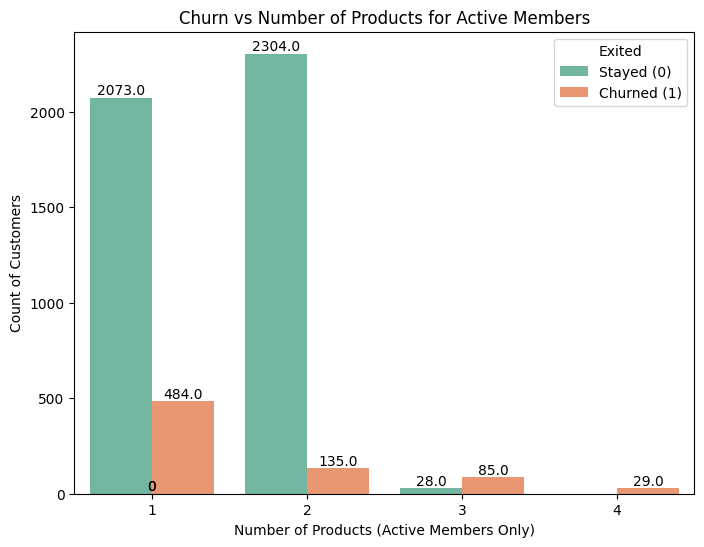

In [6]:
# Filter active members
active_df = df[df['IsActiveMember'] == 1]

plt.figure(figsize=(8,6))
ax = sns.countplot(
    data=active_df,
    x='NumOfProducts',
    hue='Exited',
    palette='Set2'
)

plt.xlabel('Number of Products (Active Members Only)')
plt.ylabel('Count of Customers')
plt.title('Churn vs Number of Products for Active Members')
plt.legend(title='Exited', labels=['Stayed (0)', 'Churned (1)'])

# Add counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', fontsize=10)

plt.show()


## Finanical Impact 

* **Revenue lost from churning**

In [87]:
# Revenue lost = sum of salaries of churned customers
revenue_lost = df[df['Exited'] == 1]['EstimatedSalary'].sum()
print(f"Total Revenue Lost from Churning Customers: ${revenue_lost:,.2f}")

Total Revenue Lost from Churning Customers: $206,570,186.77


* **How much does the average churner cost the bank?**

In [89]:
churned_customers = df[df['Exited'] == 1]

# Average cost per churned customer
avg_churn_cost = churned_customers['EstimatedSalary'].mean()
print(f"Average cost per churned customer: ${avg_churn_cost:,.2f}")

Average cost per churned customer: $101,508.69


* **CLV (Customer Lifetime Value) estimate**

CLV=Average Revenue per Period×Expected Tenure (periods)×Profit Margin

In [90]:
df['CLV'] = df['EstimatedSalary'] * df['Tenure']

# Optional: Average CLV by churn status
avg_clv_churned = df[df['Exited'] == 1]['CLV'].mean()
avg_clv_retained = df[df['Exited'] == 0]['CLV'].mean()

print(f"Average CLV for churned customers: ${avg_clv_churned:,.2f}")
print(f"Average CLV for retained customers: ${avg_clv_retained:,.2f}")

Average CLV for churned customers: $508,413.35
Average CLV for retained customers: $502,003.46


* **Segmented Revenue Impact**

Break down lost revenue by geography, age group, risk bucket, or product level. This helps identify which segments are most financially damaging when they churn.

In [10]:
def segmented_revenue_impact(filter):
    lost = df[df['Exited'] == 1].groupby(filter)['EstimatedSalary'].sum().reset_index()
    
    # Sort by revenue lost
    lost = lost.sort_values(by='EstimatedSalary', ascending=True)
    
    plt.figure(figsize=(8,6))
    sns.barplot(
        data=lost,
        y=filter,
        x='EstimatedSalary',
        palette='Set2'
    )
    
    plt.xlabel('Revenue Lost ($)')
    plt.ylabel(filter)
    plt.title(f'Revenue Lost from Churned Customers by {filter}')
    
    # Add labels on bars
    for index, value in enumerate(lost['EstimatedSalary']):
        plt.text(value, index, f"${value:,.0f}", va='center', fontsize=10)
    
    plt.show()


/var/folders/_w/hl02d98541dd3q6j_ggmh1_m0000gn/T/ipykernel_46726/98113731.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


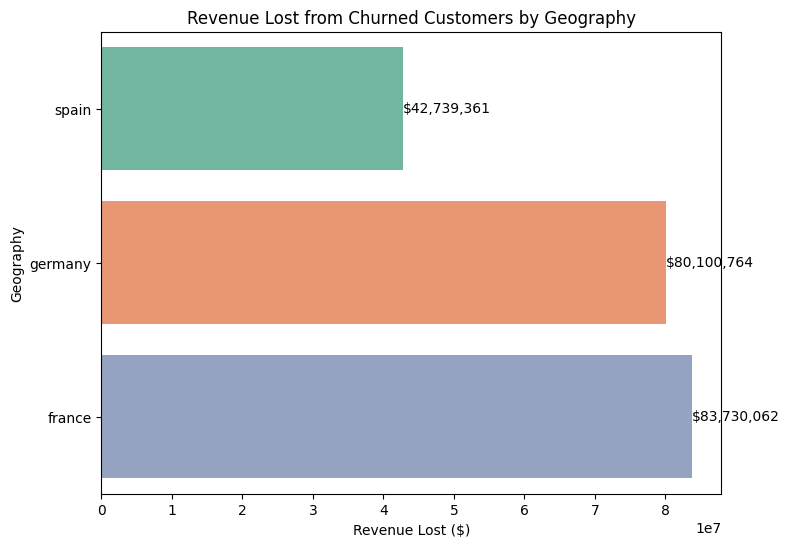

In [13]:
segmented_revenue_impact('Geography')

/var/folders/_w/hl02d98541dd3q6j_ggmh1_m0000gn/T/ipykernel_46726/98113731.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


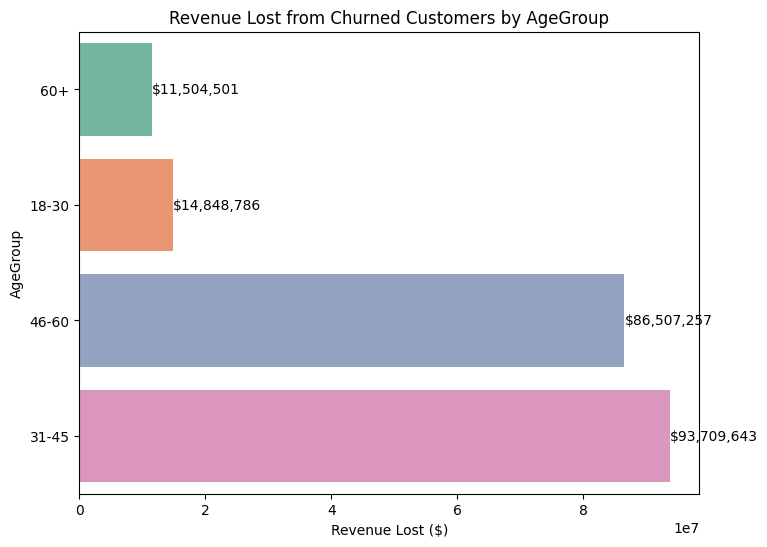

In [8]:
# Sum lost revenue by age group
segmented_revenue_impact('AgeGroup')

/var/folders/_w/hl02d98541dd3q6j_ggmh1_m0000gn/T/ipykernel_46726/98113731.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


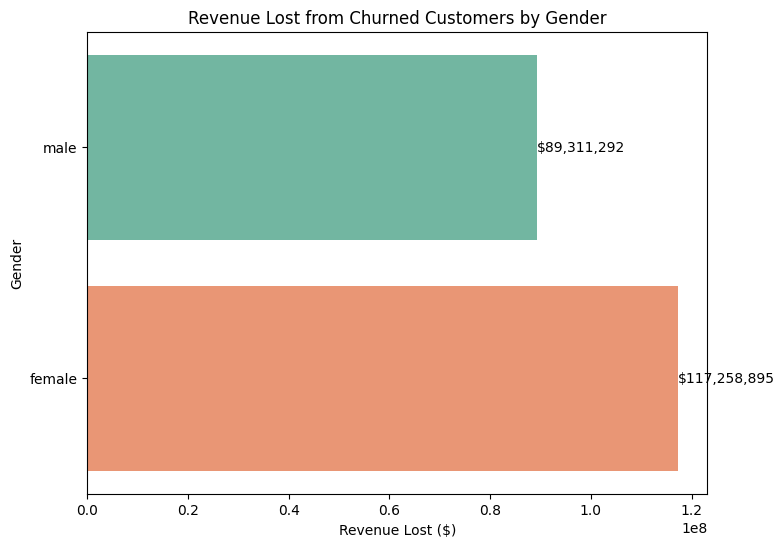

In [11]:
# Sum lost revenue by Gender
segmented_revenue_impact('Gender')

/var/folders/_w/hl02d98541dd3q6j_ggmh1_m0000gn/T/ipykernel_46726/98113731.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


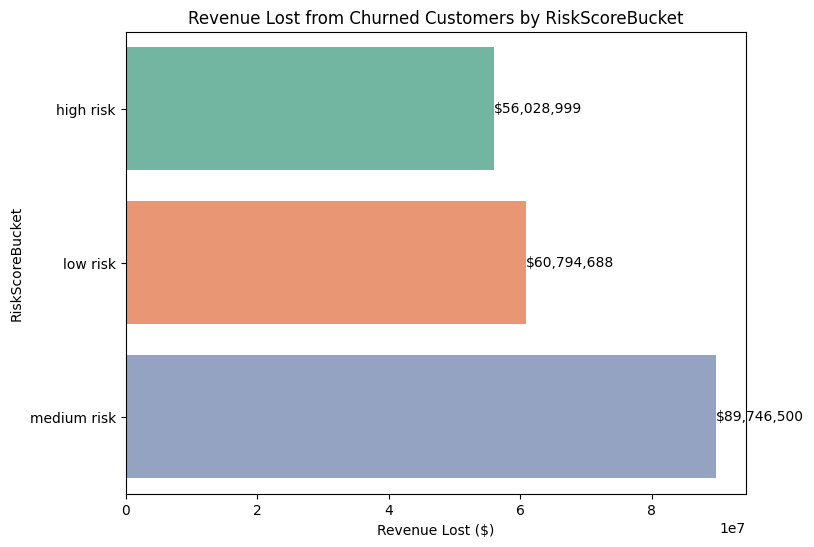

In [12]:
# Sum lost revenue by RiskScoreBucket
segmented_revenue_impact('RiskScoreBucket')

/var/folders/_w/hl02d98541dd3q6j_ggmh1_m0000gn/T/ipykernel_46726/2280164380.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


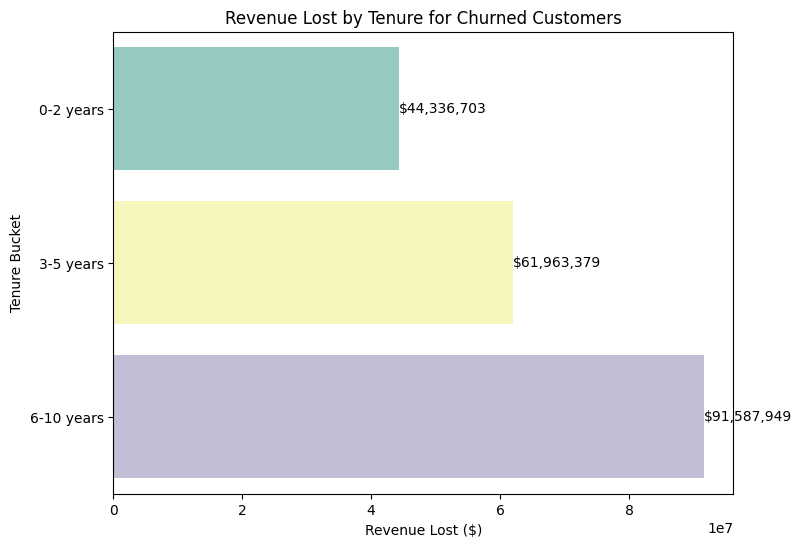

In [15]:
# Sum lost revenue by Tenure
lost_tenure = df[df['Exited'] == 1].groupby('tenure_bucket')['EstimatedSalary'].sum().reset_index()

# Sort by revenue
lost_tenure = lost_tenure.sort_values(by='EstimatedSalary', ascending=True)

plt.figure(figsize=(8,6))
sns.barplot(
    data=lost_tenure,
    y='tenure_bucket',
    x='EstimatedSalary',
    palette='Set3'
)

plt.xlabel('Revenue Lost ($)')
plt.ylabel('Tenure Bucket')
plt.title('Revenue Lost by Tenure for Churned Customers')

# Add labels on bars
for index, value in enumerate(lost_tenure['EstimatedSalary']):
    plt.text(value, index, f"${value:,.0f}", va='center', fontsize=10)

plt.show()


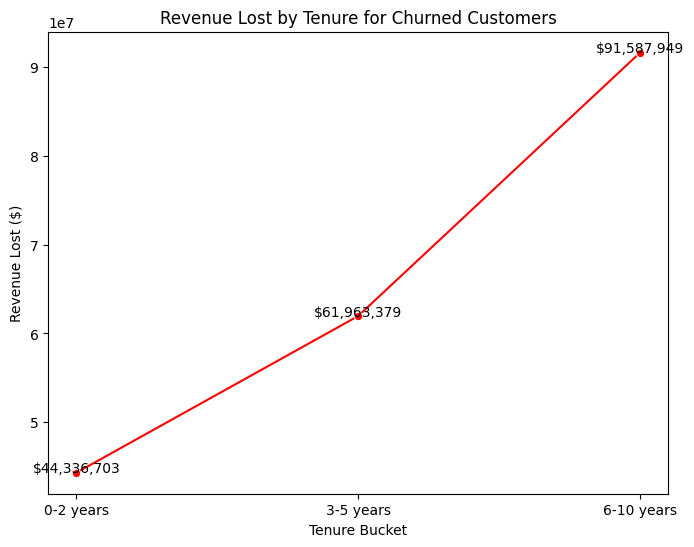

In [16]:
lost_tenure = df[df['Exited'] == 1].groupby('tenure_bucket')['EstimatedSalary'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.lineplot(
    data=lost_tenure,
    x='tenure_bucket',
    y='EstimatedSalary',
    marker='o',
    color='red'
)

plt.xlabel('Tenure Bucket')
plt.ylabel('Revenue Lost ($)')
plt.title('Revenue Lost by Tenure for Churned Customers')

# Add labels at each point
for i, value in enumerate(lost_tenure['EstimatedSalary']):
    plt.text(i, value + 5000, f"${value:,.0f}", ha='center', fontsize=10)

plt.show()


## Additional Graphs 

Tenure vs. churn heatmap with age group

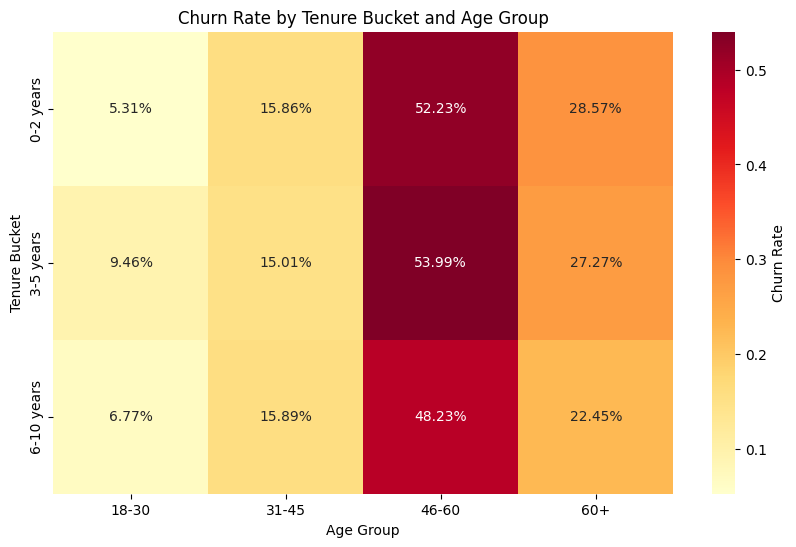

In [17]:
# Pivot table: rows = tenure bucket, columns = age group, values = churn rate
pivot = df.pivot_table(
    index='tenure_bucket', 
    columns='AgeGroup', 
    values='Exited',  # Exited = 1 if churned
    aggfunc='mean'
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".2%", cmap="YlOrRd", cbar_kws={'label': 'Churn Rate'})
plt.title('Churn Rate by Tenure Bucket and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Tenure Bucket')
plt.show()
